In [82]:
import numpy as np
import pandas as pd
# import pprint
# pp = pprint.PrettyPrinter(indent=4)


pd.set_option("display.precision", 2)

# some imports to set up plotting
import matplotlib.pyplot as plt

# !pip install seaborn
import seaborn as sns

# import some nice vis settings
sns.set()
# Graphics in the Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [84]:
DATA_URL = "./data/"
df_train = pd.read_csv(DATA_URL + "adult_train.csv",  \
                        sep=";", \
                        skipinitialspace=True)

df_test = pd.read_csv(DATA_URL + "adult_test.csv",  \
                        sep=";", \
                        skipinitialspace=True)


In [85]:
df_train.shape

(32561, 15)

In [86]:
df_test.shape

(16282, 15)

Classify people using demographic data - whether they earn more than $50,000 per year or not??

In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [88]:
df_test.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [89]:

df_train.loc[df_train["Education"] == "Bachelors"].shape
#df_train[df_train["Education"] == "Bachelors"].shape


(5355, 15)

In [90]:
# necessary to remove rows with incorrect labels in test dataset
df_test = df_test[
    (df_test["Target"] == ">50K.") | (df_test["Target"] == "<=50K.")
]


# encode target variable as integer
df_train.loc[df_train["Target"] == " <=50K", "Target"] = 0
df_train.loc[df_train["Target"] == " >50K", "Target"] = 1

df_test.loc[df_test["Target"] == " <=50K.", "Target"] = 0
df_test.loc[df_test["Target"] == " >50K.", "Target"] = 1

In [91]:
df_test.shape

(16281, 15)

In [92]:
df_test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281,73,35,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281.0,NaN,NaN,NaN,189435.68,105714.91,13492.0,116736.0,177831.0,238384.0,1490400.0
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281.0,NaN,NaN,NaN,10.07,2.57,1.0,9.0,10.0,12.0,16.0
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df_train["Target"].value_counts()

<=50K    24720
>50K      7841
Name: Target, dtype: int64

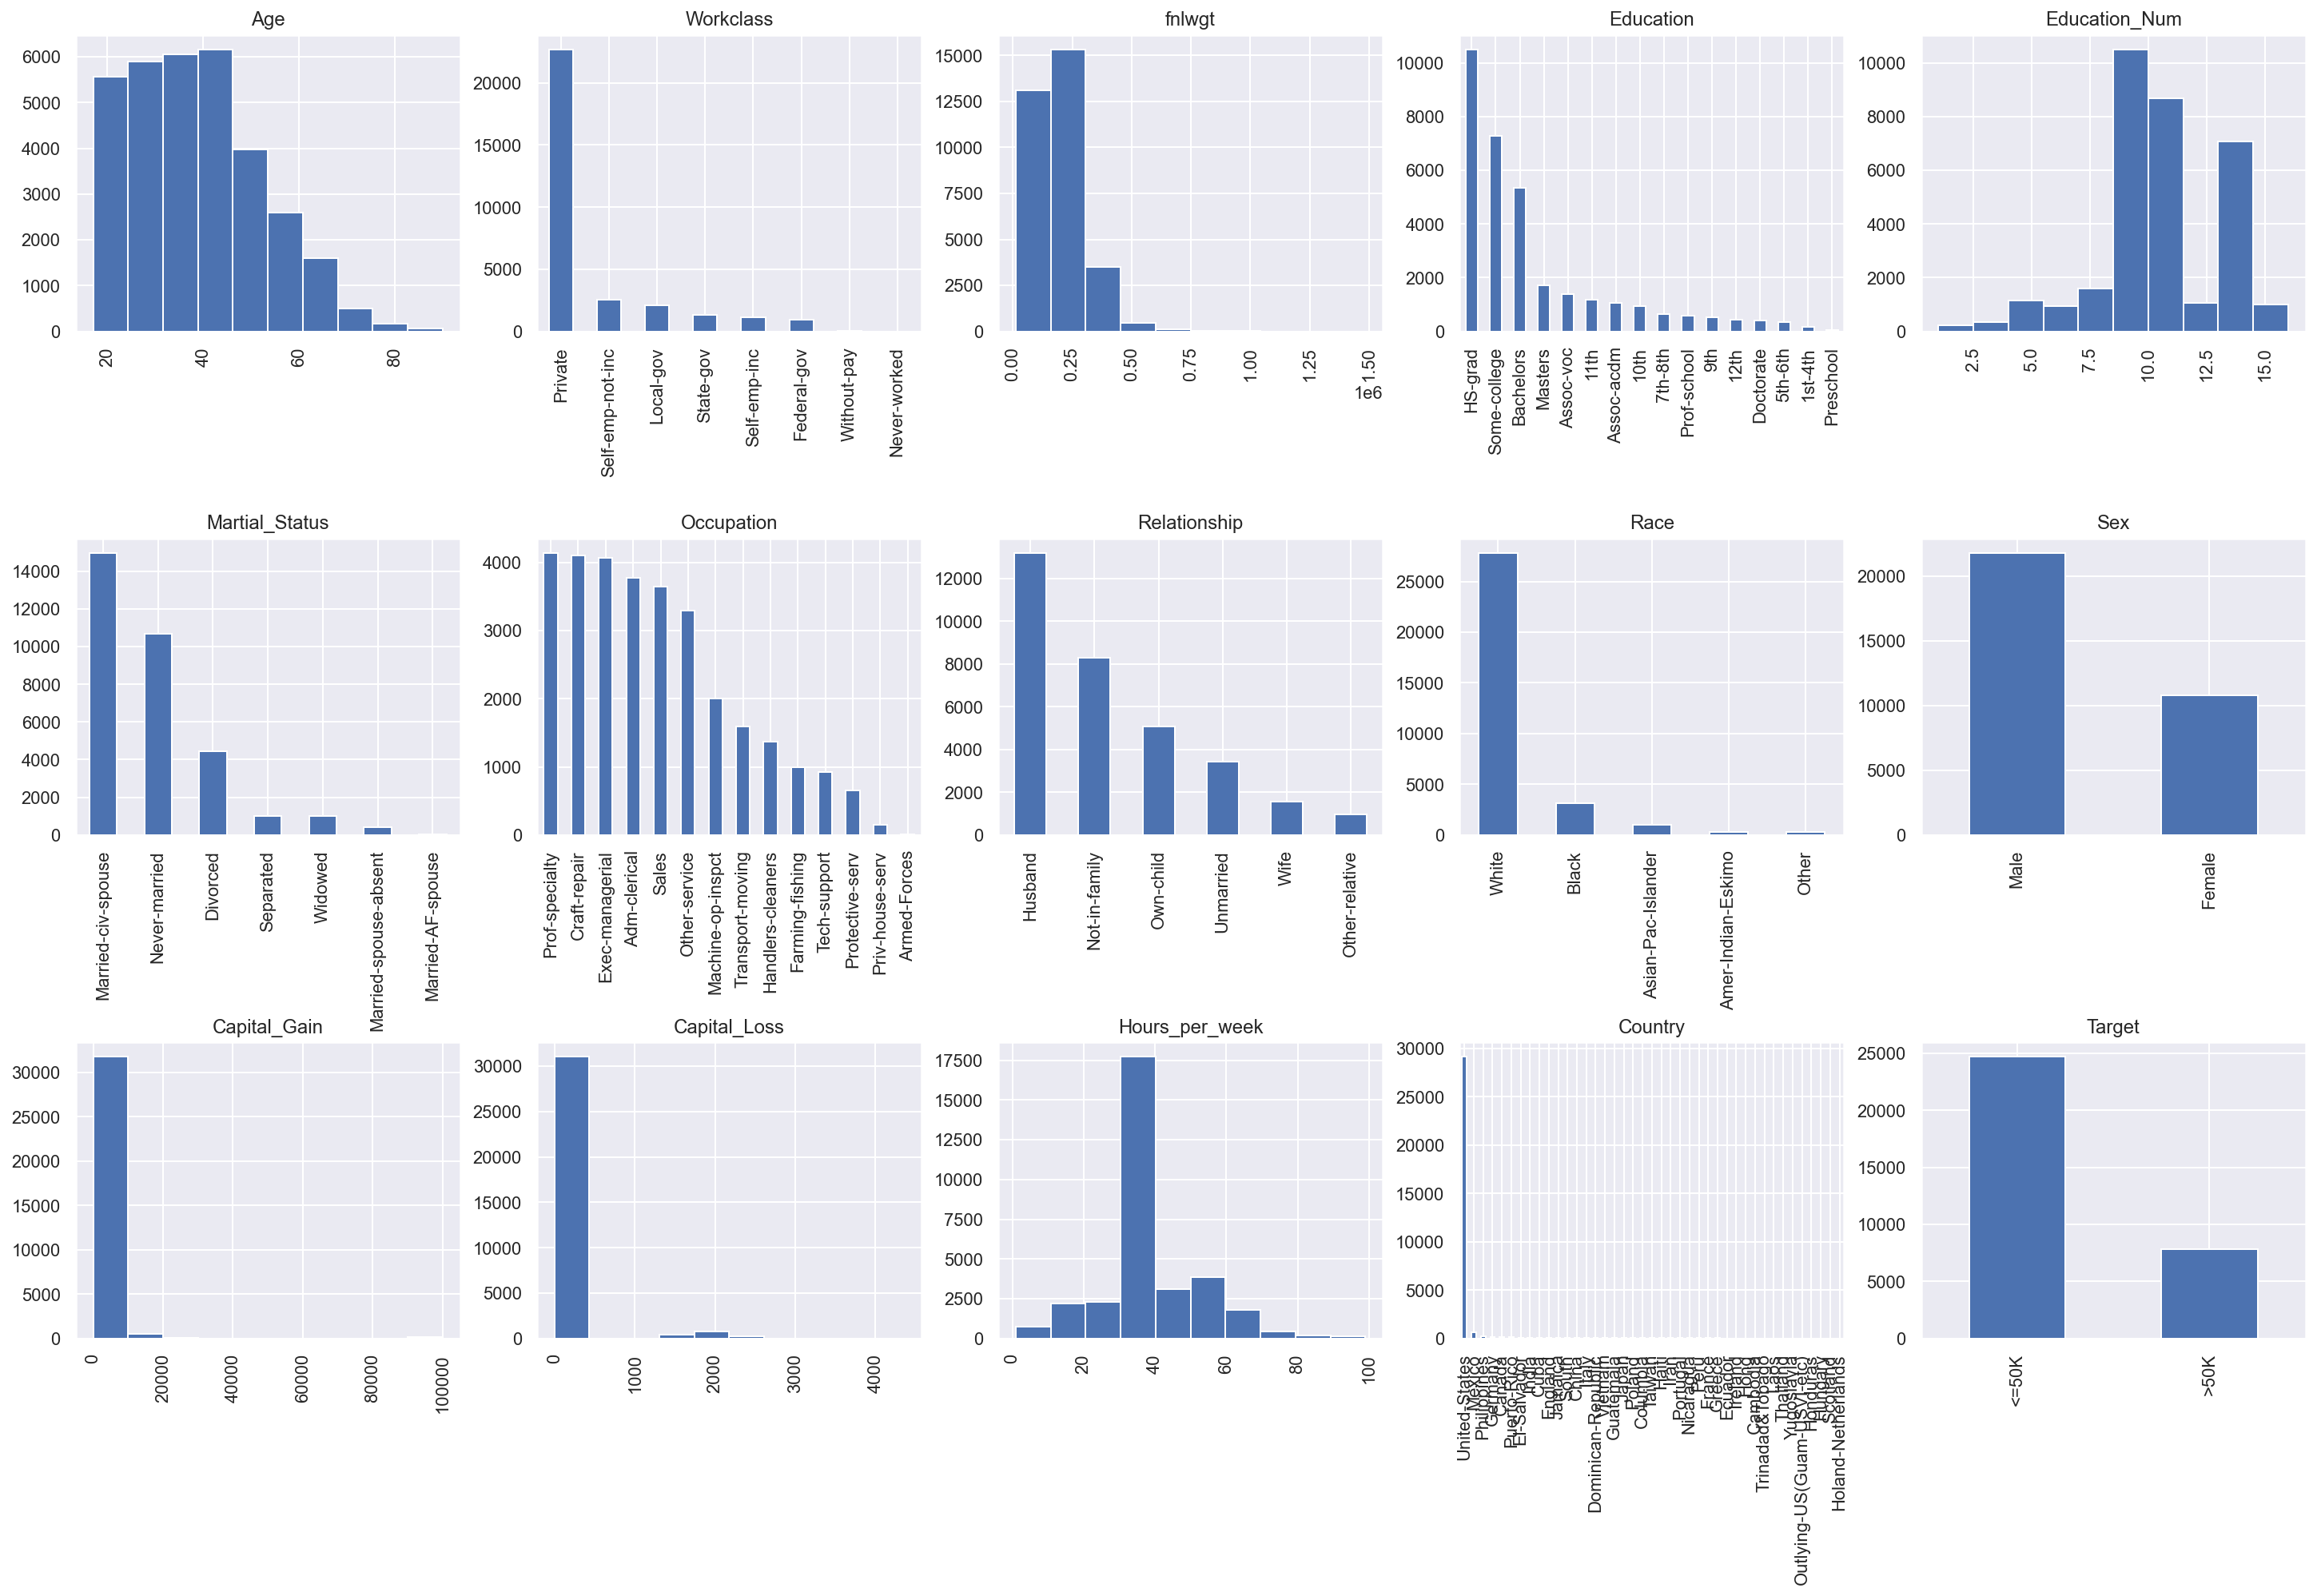

In [95]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = int(df_train.shape[1] / cols)
for i, column in enumerate(df_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df_train.dtypes[column] == object:
        df_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2);

Checking data types:

In [97]:
df_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [98]:
df_test.dtypes

Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target             object
dtype: object

In the test data, age is treated as type object - we fix that

In [100]:
df_test["Age"] = df_test["Age"].astype(int)

We’ll cast all float features to int type to keep types consistent between our train and test data.

In [101]:
df_test["fnlwgt"] = df_test["fnlwgt"].astype(int)
df_test["Education_Num"] = df_test["Education_Num"].astype(int)
df_test["Capital_Gain"] = df_test["Capital_Gain"].astype(int)
df_test["Capital_Loss"] = df_test["Capital_Loss"].astype(int)
df_test["Hours_per_week"] = df_test["Hours_per_week"].astype(int)

Fill in missing data:

In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Continuous features and Categorical features:

In [103]:
# choose categorical and continuous features from data

categorical_columns = [
    c for c in df_train.columns if df_train[c].dtype.name == "object"
]
numerical_columns = [
    c for c in df_train.columns if df_train[c].dtype.name != "object"
]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

categorical_columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']
numerical_columns: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


Fill in missing data for continuous features with their median values, for categorical features with their mode.

In [104]:
# fill missing data

for c in categorical_columns:
    df_train[c].fillna(df_train[c].mode()[0], inplace=True)
    df_test[c].fillna(df_test[c].mode()[0], inplace=True)

for c in numerical_columns:
    df_train[c].fillna(df_train[c].median(), inplace=True)
    df_test[c].fillna(df_test[c].median(), inplace=True)